In [1]:
# routlines for analyzing odes
%matplotlib inline
import matplotlib.pylab as plt 
import sys
import pickle as pk
import numpy as np
sys.path.append('/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/pkh-code/fitting')
import analyzeGotran as ao

In [4]:
data11 = ao.readPickle("/home/AD/bch265/Data_storage/10st10rsMG_0.01mMATP_cat.pickle")
data12 = ao.readPickle("/home/AD/bch265/Data_storage/10st10rsMG_0.05mMATP_cat.pickle")
data13 = ao.readPickle("/home/AD/bch265/Data_storage/10st10rsMG_1mMATP2_cat.pickle")

data21 = ao.readPickle("/home/AD/bch265/Data_storage/20st20rsMG_0.01mMATP_cat.pickle")
data22 = ao.readPickle("/home/AD/bch265/Data_storage/20st20rsMG_0.05mMATP_cat.pickle")
data23 = ao.readPickle("/home/AD/bch265/Data_storage/20st20rsMG_1mMATP2_cat.pickle")

data31 = ao.readPickle("/home/AD/bch265/Data_storage/30st30rsMG_0.01mMATP_cat.pickle")
data32 = ao.readPickle("/home/AD/bch265/Data_storage/30st30rsMG_0.051mMATP_cat.pickle")
data33 = ao.readPickle("/home/AD/bch265/Data_storage/30st30rsMG_1mMATP2_cat.pickle")

data41 = ao.readPickle("/home/AD/bch265/Data_storage/40st40rsMG_0.01mMATP_cat.pickle")
data42 = ao.readPickle("/home/AD/bch265/Data_storage/40st40rsMG_0.05mMATP_cat.pickle")
data43 = ao.readPickle("/home/AD/bch265/Data_storage/40st40rsMG_1mMATP2_cat.pickle")


Reading /home/AD/bch265/Data_storage/10st10rsMG_0.01mMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/10st10rsMG_0.05mMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/10st10rsMG_1mMATP2_cat.pickle
Reading /home/AD/bch265/Data_storage/20st20rsMG_0.01mMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/20st20rsMG_0.05mMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/20st20rsMG_1mMATP2_cat.pickle
Reading /home/AD/bch265/Data_storage/30st30rsMG_0.01mMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/30st30rsMG_0.051mMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/30st30rsMG_1mMATP2_cat.pickle
Reading /home/AD/bch265/Data_storage/40st40rsMG_0.01mMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/40st40rsMG_0.05mMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/40st40rsMG_1mMATP2_cat.pickle


In [5]:
data11.keys()
data12.keys()
data13.keys()
data21.keys()
data22.keys()
data23.keys()
data31.keys()
data32.keys()
data33.keys()
data41.keys()
data42.keys()
data43.keys()

['s_idx', 'p_idx', 'j', 'p', 's', 'j_idx', 't']

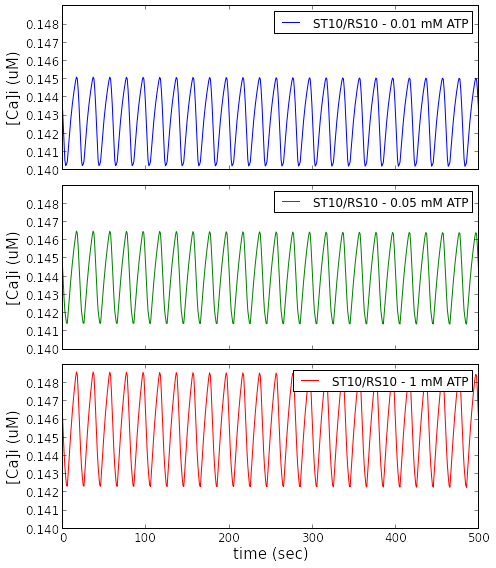

In [21]:
stateLabel = "Cai"
subData1 = ao.GetData(data11,stateLabel)
subData2 = ao.GetData(data12,stateLabel)
subData3 = ao.GetData(data13,stateLabel)
#plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/cavsfreq2.png")

plt.figure(figsize=(7,8))
ax = plt.subplot(3,1,1)
ax.tick_params(labelsize=12)
ax.plot(subData1.t*1000-965,subData1.valsIdx,'b-',label="ST10/RS10 - 0.01 mM ATP")
ax.legend(fontsize=12)
ax.set_ylabel("[Ca]i (uM)",fontsize=15)
plt.ylim(0.14,0.149)
plt.xlim(3500,4000)
labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels)
plt.tight_layout()

ax = plt.subplot(3,1,2)
ax.tick_params(labelsize=12)
ax.plot(subData2.t*1000-965,subData2.valsIdx,'g-',label="ST10/RS10 - 0.05 mM ATP")
ax.legend(fontsize=12)
ax.set_ylabel("[Ca]i (uM)",fontsize=15)
plt.ylim(0.14,0.149)
plt.xlim(3500,4000)
labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels)
plt.tight_layout()

ax = plt.subplot(3,1,3)
ax.tick_params(labelsize=12)
ax.plot(subData3.t*1000-(965+3500),subData3.valsIdx,'r-',label="ST10/RS10 - 1 mM ATP")
ax.legend(fontsize=12)
ax.set_ylabel("[Ca]i (uM)",fontsize=15)
plt.ylim(0.14,0.149)
plt.xlim(0,500)
ax.set_xlabel("time (sec)",fontsize=15)
plt.tight_layout()

plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/cavsamp10st10rs.png")

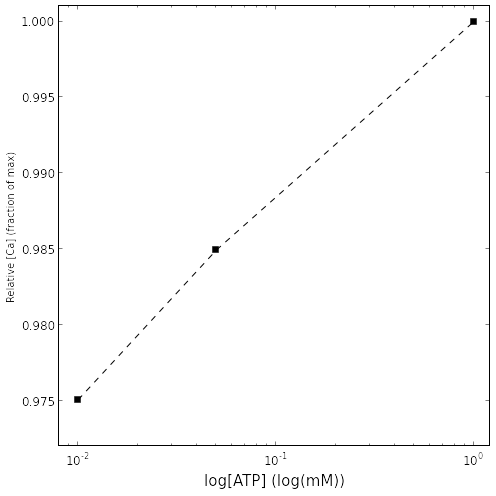

In [22]:
ca1 = max(subData1.valsIdx[3500:4000])
ca2 = max(subData2.valsIdx[3500:4000])
ca3 = max(subData3.valsIdx[3500:4000])

cas = np.array([ca1,ca2,ca3])
camax = max(cas)

car = cas/camax

amp = np.array([0.01,0.05,1])

plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
plt.semilogx(amp,car,'k--s',label="ST10/RS10")
plt.xlabel("log[ATP] (log(mM))",fontsize=15)
plt.ylabel("Relative [Ca] (fraction of max)")

plt.ylim(0.972,1.001)
plt.xlim(0.008,1.2)

plt.tight_layout()
plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/cavsamp10st10rslogplot.png")

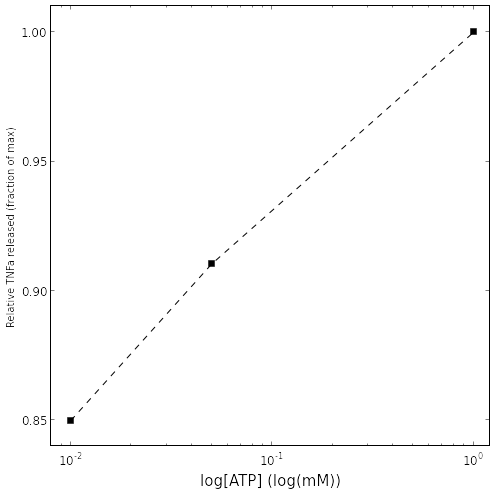

In [25]:
stateLabel = "TNFa_release"
subData1 = ao.GetData(data11,stateLabel)
subData2 = ao.GetData(data12,stateLabel)
subData3 = ao.GetData(data13,stateLabel)

tnf1 = max(subData1.valsIdx[3500:4000])
tnf2 = max(subData2.valsIdx[3500:4000])
tnf3 = max(subData3.valsIdx[3500:4000])

tnfs = np.array([tnf1,tnf2,tnf3])
tnfmax = max(tnfs)

tnfr = tnfs/tnfmax

amp = np.array([0.01,0.05,1])

plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
plt.semilogx(amp,tnfr,'k--s',label="ST10/RS10")
plt.xlabel("log[ATP] (log(mM))",fontsize=15)
plt.ylabel("Relative TNFa released (fraction of max)")

plt.ylim(0.84,1.01)
plt.xlim(0.008,1.2)

plt.tight_layout()
plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/tnfvsamp10st10rslogplot.png")